In [3]:
import numpy as np

## Glove model: https://nlp.stanford.edu/projects/glove/
* this is an algorithm that trains on words and output their representation as a 50-dimensional vector by learning the (logarithm of)  word's probability of co-occurrence

In [4]:
def read_glove_vecs(glove_file):
    '''
    Read the pretrained golve model from txt file, 
    which basically consists a dictionary and the words corresponding vectors
    
    Arguments:
         glove_file, the txt file which contains the trained glove representation of words as vectors
    
    Returns: 
        words, a set of unique words that is contained in the model; word_to_vec_map
        Taken from the coursera course: https://www.coursera.org/learn/nlp-sequence-models/notebook/5NrJ6/operations-on-word-vectors-debiasing
    '''
    with open(glove_file, 'rb') as f:
        words = set()
        word_to_vec_map = {}
        
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
            
    return words, word_to_vec_map


In [5]:
words, word_to_vec_map = read_glove_vecs('glove.6B/glove.6B.50d.txt')

In [6]:
#shows the first word in the dictionary
list(word_to_vec_map.keys())[0]

b'the'

In [7]:
#Let's look at how the word 'father' and 'mother are represented as vectors
father = word_to_vec_map[b'father']
mother = word_to_vec_map[b"mother"]

In [8]:
father

array([ 0.095496 ,  0.70418  , -0.40777  , -0.80844  ,  1.256    ,
        0.77071  , -1.0695   ,  0.76847  , -0.87813  , -0.0080954,
        0.43884  ,  1.0476   , -0.45071  , -0.58931  ,  0.83246  ,
       -0.038442 , -0.73533  ,  0.26389  ,  0.12617  ,  0.57623  ,
       -0.23866  ,  1.0922   , -0.3367   ,  0.081537 ,  0.84798  ,
       -2.4795   , -0.40351  , -0.84087  ,  0.12034  ,  0.29074  ,
        1.9711   , -0.50886  , -0.45977  , -0.13617  ,  0.55613  ,
        0.22924  , -0.18947  ,  0.43544  ,  0.65151  ,  0.043537 ,
       -0.1162   ,  0.72196  , -0.66163  , -0.17272  ,  0.27367  ,
       -0.28169  , -0.82025  , -1.5089   ,  0.052787 , -0.035579 ])

In [9]:
mother

array([ 0.4336   ,  1.0727   , -0.6196   , -0.80679  ,  1.2519   ,
        1.3767   , -0.93533  ,  0.76088  , -0.0056654, -0.063649 ,
        0.30297  ,  0.52401  ,  0.2843   , -0.38162  ,  0.98797  ,
        0.093184 , -1.1464   ,  0.070523 ,  0.58012  ,  0.50644  ,
       -0.24026  ,  1.7344   ,  0.020735 ,  0.43704  ,  1.2148   ,
       -2.2483   , -0.41168  , -0.24922  ,  0.31225  , -0.49464  ,
        2.0441   , -0.012111 , -0.19556  ,  0.085665 ,  0.27682  ,
        0.015702 ,  0.0067683,  0.12759  ,  0.87008  , -0.40641  ,
       -0.21057  ,  0.41651  , -0.021812 , -0.53649  ,  0.54095  ,
       -0.43442  , -0.52489  , -2.0277   ,  0.13136  ,  0.11704  ])

## Cosine similarity
* Cosine similarity between vectors, measures the "angle" between two vectors, the closer it to 1, the more similar between the two vectors.

In [10]:
def cosine_similarity(u, v):
    """
    Cosine similarity reflects the degree of similariy between u and v
        
    Arguments:
        u -- a word vector of shape (n,)          
        v -- a word vector of shape (n,)

    Returns:
        cosine_similarity -- the cosine similarity between u and v defined by the formula above.
    """
    
    distance = 0.0
    
    # Compute the dot product between u and v (≈1 line)
    dot = np.dot(u,v)
    # Compute the L2 norm of u (≈1 line)
    norm_u = np.linalg.norm(u)    
    # Compute the L2 norm of v (≈1 line)
    norm_v = np.linalg.norm(v)
    # Compute the cosine similarity defined by formula (1) (≈1 line)
    cosine_similarity = dot/(norm_u*norm_v)

    return cosine_similarity

In [11]:
cosine_similarity(father,mother)
#so father and mother are pretty close in terms of words!

0.8909038442893615

In [12]:
len(words)

400001

# Text clustering
* Codes are taken from http://ai.intelligentonlinetools.com/ml/text-clustering-word-embedding-machine-learning/
* shows how to cluser the senetences using K-means algorithm and the word's vector representation.

In [13]:
from nltk.cluster import KMeansClusterer
import nltk

In [14]:
from sklearn import cluster
from sklearn import metrics

In [15]:
sentences = [['this', 'is', 'the', 'one','good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book'],
            ['weather', 'rain', 'snow'],
            ['yesterday', 'weather', 'snow'],
            ['forecast', 'tomorrow', 'rain', 'snow'],
            ['this', 'is', 'the', 'new', 'post'],
            ['this', 'is', 'about', 'more', 'machine', 'learning', 'post'],  
            ['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']]

In [16]:
def sent_vectorizer(sent, model):
    '''
    Arguments: 
        sent -- a sentence, consists of tokenized words
        
        model -- model that maps words to vectors, here we are using the glove model
    Returns:
        np.asarray(sent_vec) / numw -- the averaged vector representation of all the words within a sentence
        
    '''
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            w = bytes(w, encoding= 'cp1252')
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  


In [17]:
#Build the data that is used to train the Kmeans clustering algorithm
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, word_to_vec_map))  

In [18]:
#set number of clusters for k-means
NUM_CLUSTERS=2

In [19]:
# So sentence 4,5,6 are being clustered in one group
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)

[0, 0, 0, 1, 1, 1, 0, 0, 0]


In [20]:
for index, sentence in enumerate(sentences):    
    print (str(assigned_clusters[index]) + ":" + str(sentence))

0:['this', 'is', 'the', 'one', 'good', 'machine', 'learning', 'book']
0:['this', 'is', 'another', 'book']
0:['one', 'more', 'book']
1:['weather', 'rain', 'snow']
1:['yesterday', 'weather', 'snow']
1:['forecast', 'tomorrow', 'rain', 'snow']
0:['this', 'is', 'the', 'new', 'post']
0:['this', 'is', 'about', 'more', 'machine', 'learning', 'post']
0:['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']


In [21]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
#print (centroids)
  
#not sure what the score is
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[0 0 0 2 1 1 0 0 0]
Centroids data
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-5.997186945249084
Silhouette_score: 
0.49553920702192233


0 ['this', 'is', 'the', 'one', 'good', 'machine', 'learning', 'book']
0 ['this', 'is', 'another', 'book']
0 ['one', 'more', 'book']
1 ['weather', 'rain', 'snow']
1 ['yesterday', 'weather', 'snow']
1 ['forecast', 'tomorrow', 'rain', 'snow']
0 ['this', 'is', 'the', 'new', 'post']
0 ['this', 'is', 'about', 'more', 'machine', 'learning', 'post']
0 ['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']


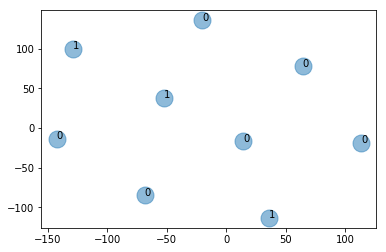

In [22]:
# using Tsne(https://lvdmaaten.github.io/tsne/) to visulize the result classfier
%matplotlib inline
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
 
 
plt.scatter(Y[:, 0], Y[:, 1], s=290,alpha=.5)
 
 
for j in range(len(sentences)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   print ("%s %s" % (assigned_clusters[j],  sentences[j]))
 
 
plt.show()

# Document Classification
* Methodology: mimic senetence classification, but instead of averaging all the words in a sentence by their glove representation, we average all the words in a documents and feed the result vector into a classificaton algorithm

In [23]:
#read in data from path
from pathlib import Path

pathlist = Path("Data_Small").glob('**/*.txt')
doc_collections = []
for path in pathlist:
    #print(path)
    with path.open("rb") as f: 
        text = f.readline()
        doc_collections.append(text)
        

In [24]:
#function to tokenize a list of documents
from nltk.tokenize import word_tokenize
def get_tokens(doclist):
    '''
    function to tokenize a given document
    
    Arguments: 
        doclist -- list of documents to be tokenized
        
    Returns:
        token_list -- list of words in the document after tokenization
    '''
    token_list = []
    for doc in doclist:
        dirty_tokens = nltk.word_tokenize(doc)
        token_list += [dirty_tokens]
    return token_list


In [25]:
#Download collection of english of stop words, probably should include more
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords 
stop_words=set(stopwords.words("english")) 
non_stop_words = set(words)-stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\8135t\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
#Download a list of punctuations to be filterd
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\8135t\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
#https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908
#preprocess text in document list: for each text, we remove the digits and punctuation in it, then 
#tokenize the text by words and finally remove the stop words
import re

def text_preprocessor(raw_text):
    '''
    function to preprocess a given document
    
    Arguments: 
        raw_text -- document before preprocessing
        
    Returns:
        list of unique words contained in the document after preprocessing
    '''

    lower_lettered = raw_text.lower()
    
    digit_removed = re.sub(r'\d+', '', lower_lettered )
    
    punct_removed = re.sub(r'[^\w\s]','',digit_removed)
    
    word_tokenized = word_tokenize(punct_removed)
    
    result = [i for i in word_tokenized if not i in stop_words]
    
    #print(len(result))
    return set(result)



In [28]:
#Let's take a look at one processed text as one example
#some text spits out a decode error, solution found in https://stackoverflow.com/questions/29419322/unicodedecodeerror-utf8-codec-cant-decode-byte-0x92-in-position-377826-inva
processed_example = text_preprocessor(doc_collections[0].decode("cp1252"))
processed_example

{'httpsgitlfsgithubcomspecv', 'version'}

In [29]:
def doc_vectorizer(doc, model):
    '''
    function used to map a given document to a vector, mimic sent_vectorizer
    
    Arguments:
        doc: the document to be vectorized
        model: the model used to vectorize word, here we are using GloVe
        
    Returns:
         np.asarray(sent_vec) / numw: average vector represents the document
    '''
    doc_vec =[]
    numw = 0
    for w in doc:
        try:
            #read the key in binary mode
            w = bytes(w, encoding= 'cp1252')
            if numw == 0:
                doc_vec = model[w]
            else:
                doc_vec = np.add(doc_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(doc_vec) / numw
  

In [30]:
#example of vector that represent a document
doc_vectorizer(processed_example, word_to_vec_map)

array([ 0.051293, -0.26675 , -0.018365, -0.18127 , -0.36027 ,  0.8379  ,
       -0.92812 , -1.6883  , -0.59773 ,  0.90649 ,  0.35224 ,  0.54026 ,
        0.14898 ,  0.50083 ,  0.79767 , -0.061373, -0.91955 ,  0.58789 ,
       -0.43823 , -0.40394 , -0.030739, -0.10485 ,  0.028128,  0.42683 ,
        0.42864 , -0.77797 , -1.0065  ,  0.30549 , -0.092836, -0.23479 ,
        3.1454  , -1.2909  , -0.45878 ,  0.48342 ,  0.47716 , -0.088498,
        1.2245  , -0.35658 , -1.3234  , -1.2299  ,  0.6993  , -0.055224,
       -0.51072 , -0.97704 , -0.50898 ,  0.56811 ,  0.38373 , -0.2553  ,
       -0.28489 ,  0.56349 ])

In [31]:
from timeit import default_timer as timer

In [40]:
#Read in full set of documents and time it
start = timer()

full_pathlist = Path("Data").glob('**/*.txt')
full_doc_collection = []

for path in list(full_pathlist)[0:1500]:
    #print(path)
    with path.open("rb") as f: 
        text = f.readline()
        full_doc_collection.append(text)


end = timer()
print(end - start)
        

14.034660149361628


In [41]:
#preprocss each document in the list
start = timer()

processed_docs=[]
for raw_text in full_doc_collection:
   processed_docs.append(text_preprocessor(raw_text.decode("cp1252"))) 

end = timer()
print(end - start)

147.55940875978558


In [42]:
#get vector representation for each documents
doc_vectors=[]
start = timer()
for token in processed_docs:
    doc_vectors.append(doc_vectorizer(token, word_to_vec_map))
print(timer()-start)

9.563567526358952


In [35]:
from collections import OrderedDict

def find_most_simiar_word(word_vector,n):
    '''
    function to find the first n most similar word (in terms of cosine similarity) in the dictionary(minus the stop words) with a given word's vector form
    
    Arguments:
        word_vector -- word in vector form to be meausred. 
    Returns:
        ordered_list_of_cosine -- a dictionary ordered by the cosine similarity between word_vector and all the word in the list of 
        words in the model
    
    '''
    # Initialize best_word with None, it will help keep track of the word to output
    #find the closed n word
    # loop over the whole word vector set
    dict_of_cosine_sim={}
    for w in non_stop_words:        

        # Compute cosine similarity between the vector given and the vector (w's vector representation) 
        cosine_sim = cosine_similarity(word_vector, word_to_vec_map[w])
        
        dict_of_cosine_sim[w.decode("utf-8")] = cosine_sim

        # If the cosine_sim is more than the max_cosine_sim seen so far,
        ### END CODE HERE ###
            
    ordered_dict_of_cosine = OrderedDict(sorted(dict_of_cosine_sim.items(), key=lambda t: t[1],reverse=True))

    return list(ordered_dict_of_cosine)[:n]

In [36]:
find_most_simiar_word(word_to_vec_map[b'father'],4)

['father', 'son', 'brother', 'grandfather']

In [89]:
from sklearn.cluster import DBSCAN

In [90]:
clustering = DBSCAN(eps=0.1, min_samples=2).fit(doc_vectors)

In [91]:
clustering.labels_

array([-1, -1], dtype=int64)

In [92]:
clustering.core_sample_indices_

array([], dtype=int64)

In [43]:
len(doc_vectors)

1500

In [51]:
kmeans = cluster.KMeans(n_clusters=100)
kmeans.fit(doc_vectors)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
#print (centroids)
  
#not sure what the score is
  
silhouette_score = metrics.silhouette_score(doc_vectors, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[39 66 24 ... 25 59  2]
Centroids data
Silhouette_score: 
0.0927883142746712


In [67]:
list_n_clusters = list(range(2,10))

In [68]:
s_score = []
centroids_collections = []
for n in list_n_clusters:
    kmeans = cluster.KMeans(n_clusters=n)
    kmeans.fit(doc_vectors)
    labels = kmeans.labels_

    silhouette_score = metrics.silhouette_score(doc_vectors, labels, metric='euclidean')
    s_score.append(silhouette_score)

In [69]:
len(s_score)

98

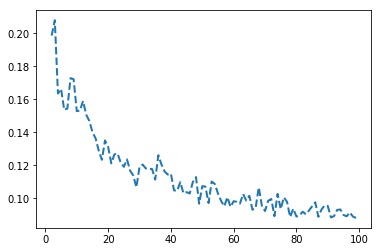

In [70]:
plt.plot(list_n_clusters, s_score, '--', linewidth=2)